<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/%C4%87wiczenie_kolorowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Colab Notebooks")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
videogames_df = pd.read_csv(os.path.join('vgsales.csv'))
videogames_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [17]:
current_directory = os.getcwd()
print(current_directory)

/content


In [25]:
videogames_df = videogames_df[['Global_Sales', 'Genre', 'Year']]

In [27]:
genres = videogames_df['Genre'].unique()[:5]
videogames_df = videogames_df[videogames_df['Genre'].isin(genres)]

In [28]:
videogames_df_groupped = videogames_df.groupby(['Genre', 'Year']).agg('sum')

In [29]:
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
colors_palette = sns.set_palette(sns.color_palette(colors))

<ipython-input-30-9ab7d6f24f24>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sales_plot = sns.lineplot(x='Year', y='Global_Sales', hue='Genre', palette=colors_palette, ci=None, data=videogames_df_groupped)


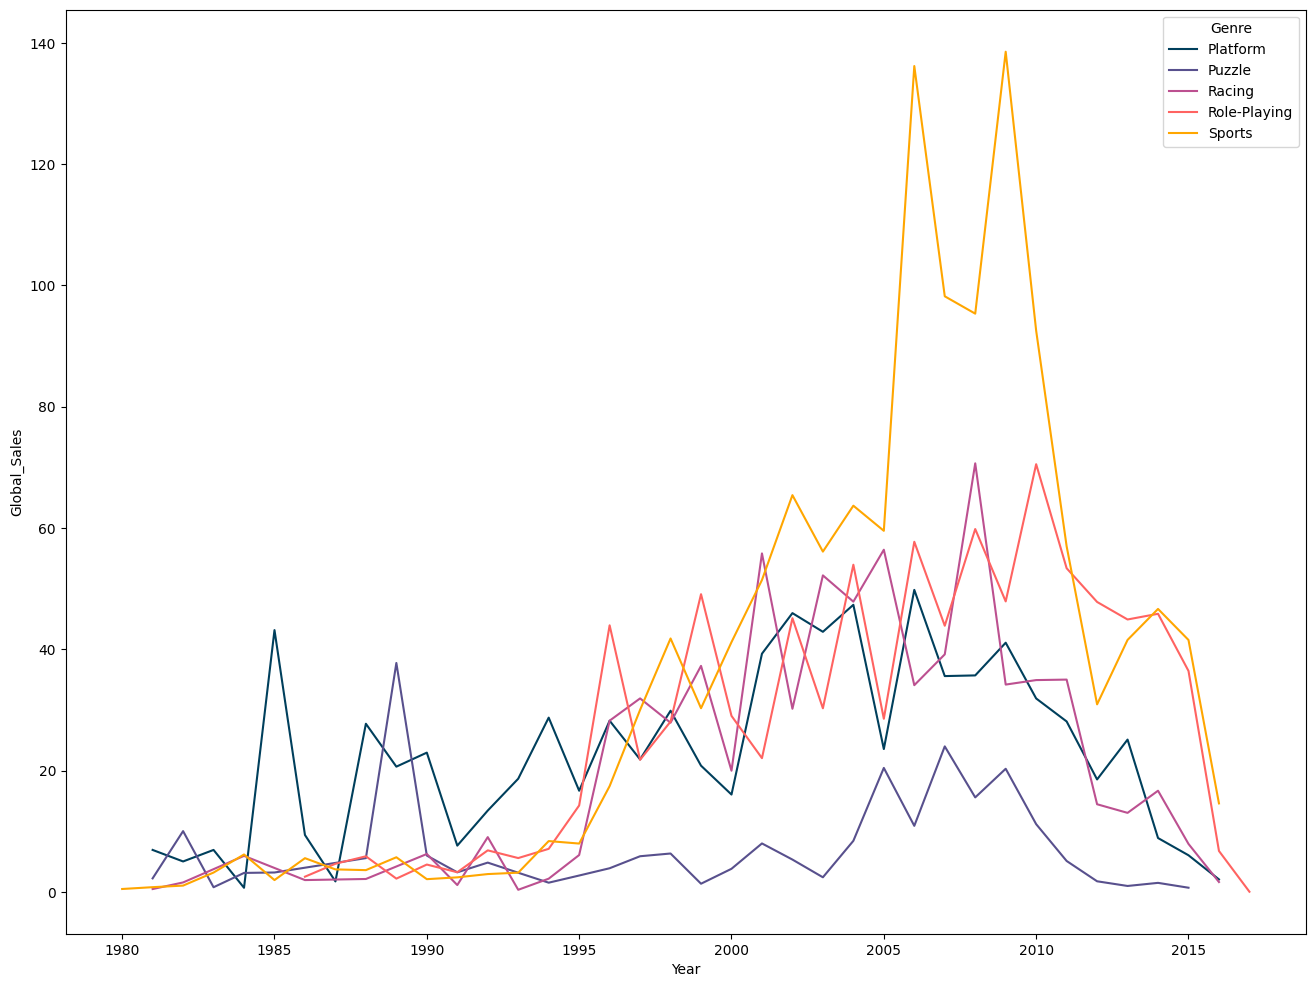

In [30]:
# ustawiamy rozmiar wykresu na większy niż domyślny, aby poprawić czytelność
plt.figure(figsize=(16, 12))
sales_plot = sns.lineplot(x='Year', y='Global_Sales', hue='Genre', palette=colors_palette, ci=None, data=videogames_df_groupped)